<a href="https://colab.research.google.com/github/jplpereira/Ocean_DeepLearning_09_02_2021/blob/main/Ocean_DeepLearning_09_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca Keras

In [1]:
import keras

Importando o banco de dados mnist com os algarismos escritos à mão

In [2]:
from keras.datasets import mnist

Importando a função to_categorical da biblioteca Keras

In [3]:
from keras.utils import to_categorical as to_cat

Importando a arquitetura da rede neural

In [4]:
from tensorflow.python.keras import Sequential

Dense é o neurônio (base da rede) e Dropout é o regularizador que evita o overfitting

In [5]:
from tensorflow.python.keras.layers import Dense, Dropout

RMSdrop é o otimizador (back propagation)

In [6]:
from tensorflow.compat.v1.keras.optimizers import RMSprop

Importando a função pyplot da biblioteca matplotlib

In [7]:
import matplotlib.pyplot as plt

Carregando os dados de treino e teste

In [8]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

Analisando o dataset e a sua estrutura

In [9]:
print('Quantidade de imagens para treino:', len(x_treino))

Quantidade de imagens para treino: 60000


In [10]:
print('Quantidade de imagens para teste:', len(x_teste))

Quantidade de imagens para teste: 10000


In [11]:
print('Tipo de x_treino:', type(x_treino))

Tipo de x_treino: <class 'numpy.ndarray'>


In [12]:
primeira_imagem = x_treino[0]
primeira_imagem

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
print('A primeira imagem representa o número: ', y_treino[0])

A primeira imagem representa o número:  5


In [14]:
print('Formato da primeira imagem: ', primeira_imagem.shape)

Formato da primeira imagem:  (28, 28)


Mostrando a imagem cujo indice foi escolhido

A imagem representa o número:  8


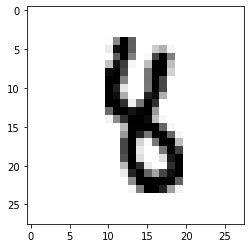

In [15]:
indice = 7000
print('A imagem representa o número: ', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)

Fluxo para construção de rede neural
*   Organizar a camada de entrada (input)
*   Organizar a camada de saída (output)
*   Estruturar a nossa rede neural
*   Treinar o modelo
*   Fazer as previsões

Achatando a matriz de pixels e transformando numa única lista

In [16]:
quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [17]:
print('Quantidade de itens em x_treino[0]: ', len(x_treino[0]))
print(x_treino[0])

Quantidade de itens em x_treino[0]:  784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

Normalização dos dados
* 255 vira 1
* 127 vire aproximadamente 0.5
* 0 continue 0

In [18]:
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')
x_treino /= 255
x_teste /= 255

In [19]:
imagem = 0
pixel = 350
print('Valor do pixel: ', x_treino[imagem][pixel], '\nTipo do valor do pixel: ', type(x_treino[imagem][pixel]))

Valor do pixel:  0.27450982 
Tipo do valor do pixel:  <class 'numpy.float32'>


Preparação da camada de saída (output)

In [20]:
valores_unicos = set(y_treino)
valores_unicos

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [21]:
quantidade_valores_unicos = len(valores_unicos)
quantidade_valores_unicos

10

In [22]:
print('y_teste[0] antes: ', y_treino[0])

y_teste[0] antes:  5


In [23]:
y_treino = to_cat(y_treino, quantidade_valores_unicos)
y_teste = to_cat(y_teste, quantidade_valores_unicos)

In [24]:
print('y_teste[0] depois: ', y_treino[0])

y_teste[0] depois:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Criando o modelo da rede neural

In [25]:
model = Sequential()

Primeira hidden layer
* 30 Neurônios
* Função de ativação: ReLu
* Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

In [26]:
model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

Adicionamos um regularizador que ajuda a evitar o overfitting

In [27]:
model.add(Dropout(0.2))

Segunda hidden layer
* 20 neurônios
* Função de ativação: ReLu

In [28]:
model.add(Dense(20, activation='relu'))

Outra camada de regularizador

In [29]:
model.add(Dropout(0.2))

Finalizamos com a camada de saída (output), informando a quantidade de valores únicos que, no caso, é 10
* Neurônios: 10
* Função de ativação: Softmax

In [30]:
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

Exibe o resumo do modelo criado

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


Para compilar o modelo, precisamos informar:
* Função de erro
* Algoritmo de backpropagation
* Dados para treino (imagens normalizadas e labels categorizadas)
* Dados para teste (imagens normalizadas e labels categorizadas)
* Quantidade de épocas que queremos rodar (sendo 1 época equivalente a analisar TODAS as imagens de treino)
* Tamanho de cada batch
  - supondo que  

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Treina o modelo

In [33]:
history = model.fit(x_treino, y_treino,
    batch_size = 128,
    epochs=10,
    verbose=1,
    validation_data=(x_teste,y_teste)
)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.2053 - accuracy: 0.5987 - val_loss: 0.3295 - val_accuracy: 0.9091
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5148 - accuracy: 0.8427 - val_loss: 0.2539 - val_accuracy: 0.9247
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8731 - val_loss: 0.2211 - val_accuracy: 0.9337
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8893 - val_loss: 0.2013 - val_accuracy: 0.9399
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8971 - val_loss: 0.1929 - val_accuracy: 0.9432
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3224 - accuracy: 0.9061 - val_loss: 0.1776 - val_accuracy: 0.9499
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.9102 - val_loss: 0.1766 - val_accuracy: 0.9484
Epoch 

Fazendo as previsões

In [36]:
indice = 100

print('Valor categórico em y_teste[indice]: ', y_teste[indice])

imagem = x_teste[indice].reshape(1, resolucao_total)

prediction = model.predict(imagem)
print('Previsão: ', prediction)

(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()

Valor categórico em y_teste[indice]:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
